# The Rise (and Fall?) of Conor Mcgregor
## By Frederick Almond

![WalkUrl](https://media.giphy.com/media/uypubDRjnv0icWp2hV/giphy.gif "Walk")

# First, some background...
Conor McGregor. Quite a polarizing name to most. For those of you who don't know, Conor McGregor is an irish mixed martial artist currently competing in the Ultimate Fighting Competition (UFC). He is the former featherweight (145lbs) and lightweight (155lbs) champion, and is the first ever competitor in UFC history to have been a champion in two weight classes simultaneously. He is widely regarded as the most influential mixed martial artist ever, and is recognized for his massive role in catapulting MMA onto the global stage. Conor's rise to fame not only came from skill that was ahead of his time, but his immense confidence and trash talking that came with it. He earned the nickname "The Mystic Mac" after predicting many of his victories down to the round and method of victory. As you can imagine, this gained him a boatload of fans very quickly, and made his brand expand outside of just MMA. Further reading on Conor is available at: https://en.wikipedia.org/wiki/Conor_McGregor

# Okay. So what about him?

In recent years, Conor has changed in many ways. Money, fame, and a huge ego have put him in a completely different position than when he started competing in MMA. As time has gone on, many factors have changed, not only relating to his lifestyle, but also in MMA. Fighters have become more well-rounded since McGregor's meteoric rise, where as Conor has mostly stuck to his traditional, hands-low, karate style of fighting, which is part of his appeal to fans. In this project, my goal is to try and use data science to better understand factors that may have had an affect upon his performance. I will explore many different factors, each as their own section. Many people argue that he is now "washed up", while his fans (myself included) hope that he may one day snag UFC gold again.

# The Data
The data I will use will mostly only be on fights in the UFC. It's worth noting that of Conor's record of 22 wins and 6 losses, only the 14 most recent of those fights were in the UFC. The internet has very conveniently blessed the world with http://ufcstats.com/statistics/events/completed. This website has detailed statistics on every fighter and fight that has taken place in the UFC. It has statistics on a fighter as a whole, on specific fights, and even specific rounds of fights. It allows us to see how many strikes a fighter lands, their accuracy, where the strikes landed, how many takedowns they land or go for, and much more.

# Data Collection
Below is the code I used to grab the intial data from ufcstats page on Conor. The table that I extracted with pandas lists all of Conor's fights, along with a few major data points on these. These points include: whether Conor won or lost, who he fought, # of knockdowns by both fighters, # of significant strikes landed by both fighters, # of takedowns attempted by both fighters, # of submissions attempted by both fighters, the name of the event, date of the event, what round the fight finished in, and at what time of that round the fight finished at.

In [30]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs

# Use pandas to grab the table of Conor's fights
df = pd.read_html("http://ufcstats.com/fighter-details/f4c49976c75c5ab2", header=[0])[0]
df = df.iloc[1: , :] # Get rid of first row, which is just NaN's
df.head()

,W/L,Fighter,Kd,Str,Td,Sub,Event,Method,Round,Time
1,loss,Conor McGregor Dustin Poirier,0 0,27 36,0 1,1 0,"UFC 264: Poirier vs. McGregor 3 Jul. 10, 2021",KO/TKO,1.0,5:00
2,loss,Conor McGregor Dustin Poirier,0 1,29 48,0 1,0 0,"UFC 257: Poirier vs. McGregor Jan. 23, 2021",KO/TKO Punches,2.0,2:32
3,win,Conor McGregor Donald Cerrone,1 0,19 0,0 0,0 0,"UFC 246: McGregor vs. Cowboy Jan. 18, 2020",KO/TKO Punches,1.0,0:40
4,loss,Conor McGregor Khabib Nurmagomedov,0 0,51 70,0 3,0 1,"UFC 229: Khabib vs. McGregor Oct. 06, 2018",SUB Neck Crank,4.0,3:03
5,win,Conor McGregor Eddie Alvarez,3 0,32 9,0 0,0 0,"UFC 205: Alvarez vs McGregor Nov. 12, 2016",KO/TKO Punches,2.0,3:04


# Factor 1: Pay per Fight
![MoneyUrl](https://media.giphy.com/media/tuWADkb2g3PAk/giphy.gif "Money")

It's no surprise that as McGregor's popularity grew, so did his paychecks. Conor started at a mere 8,000 dollars to show up to fight, and an additional $8,000 to win. Don't forget, that's before taxes as well as paying his fighting team. This was also before he earned numerous, lucrative sponsorships and started many of his own businesses, which have only further fattened his pockets. I was able to find his pay (excluding additional earnings from Pay-per-view percentages) for each fight in the UFC from https://thesportsdaily.com/2021/07/11/conor-mcgregor-career-earnings-fox11/. Is the saying, "It’s tough to get out of bed to do roadwork at 5am when you’ve been sleeping in silk pajamas" true for Conor? Or has the money not gotten to his head in terms of performance? My guess is that more money means worse performance, as this usually holds true. Let's find out.

In [31]:
# Add the pay Conor earned for each fight to our dataframe
pay = [5011000, 5011000, 3060000, 2980000, 3090000, 3090000, 1090000, 590000, 580000, 220000, 200000, 82000, 24000, 76000]
df["Pay"] = pay
df = df.iloc[::-1] # Reverse the dataframe so oldest fights are at top
df.head()

,W/L,Fighter,Kd,Str,Td,Sub,Event,Method,Round,Time,Pay
14,win,Conor McGregor Marcus Brimage,1 0,21 12,0 0,0 0,"UFC on FUEL TV: Mousasi vs Latifi Apr. 06, 2013",KO/TKO Punches,1.0,1:07,76000
13,win,Conor McGregor Max Holloway,0 0,53 23,4 0,0 0,"UFC Fight Night: Shogun vs Sonnen Aug. 17, 2013",U-DEC,3.0,5:00,24000
12,win,Conor McGregor Diego Brandao,1 0,18 9,1 0,0 1,"UFC Fight Night: McGregor vs Brandao Jul. 19,...",KO/TKO Punch,1.0,4:05,82000
11,win,Conor McGregor Dustin Poirier,1 0,9 10,0 0,0 0,"UFC 178: Johnson vs Cariaso Sep. 27, 2014",KO/TKO Punch,1.0,1:46,200000
10,win,Conor McGregor Dennis Siver,1 0,64 32,0 0,0 0,"UFC Fight Night: McGregor vs Siver Jan. 18, 2015",KO/TKO Punch,2.0,1:54,220000


Now that we have his pay per fight, let's calculate his cumulative win loss ratio before each fight. Here I'm going to start the win-loss ratio to include his record before the UFC (12-2). It's safe to assume that he was making much less per fight before he joined the organization. This would start him with a win-loss of 6.0.

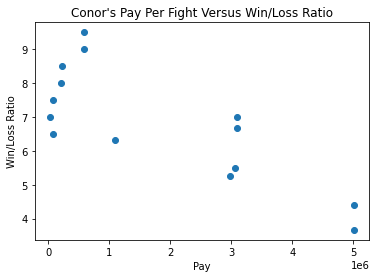

In [32]:
# Iterate through the dataframe and keep a running tab of Conor's professional record
wins = 12
losses = 2
ratio = wins/losses
wl_ratio_column = []
record_column = []

# Go through the dataframe from bottom to top, since the bottom of the dataframe is the oldest fight
for idx in df.index:
    if df.loc[idx, "W/L"] == "win":
        wins += 1
    else:
        losses += 1
    
    ratio = wins/losses
    wl_ratio_column += [ratio]
    record_column += ["{}-{}".format(str(wins), str(losses))]
    
# Add the wl ratio and record to the dataframe
df["Record After Fight"] = record_column
df["Win/Loss Ratio"] = wl_ratio_column
df = df.reset_index() # Fix indicies
df = df.drop("index", axis=1)

# Finally, lets visualize this
import matplotlib.pyplot as mlp
mlp.title("Conor's Pay Per Fight Versus Win/Loss Ratio")
mlp.ylabel("Win/Loss Ratio")
mlp.xlabel("Pay")
mlp.plot(df["Pay"], df["Win/Loss Ratio"], "o")

As you can see, as Conor's pay increased, it seems that his win-loss ratio decreased. He had an inital 7 fight win streak, and after that, he started making over $500,000 per fight, which is around when his win-loss ratio rapidly declined. Other factors aside, it does seem that as Conor earned more money, he also earned more losses. But remember, correlation does not equal causation!

## Factor 2: Weight Class
![WeightUrl](https://media.giphy.com/media/3oriOhQyxEDAme8td6/giphy.gif "Weight")

In fighting, a huge part of a fighter's performance can come from what weight they choose to fight at. Now it's important to note that the majority of fighters cut a significant amount of weight, so that they can compete in a lighter weight class. The idea is that fighting smaller opponents gives one a competitive advantage. Conor has competed in three different weight classes, 145lbs, 155lbs, and 175lbs. His natural weight is probably closest to 155lbs. Has the weight class that Conor competes at had a big effect on his performance? As someone who had to cut weight when I wrestled in highschool, I personally felt less competitive when I didn't compete at my natural weight. My guess is that Conor probably did worse as well.

## More Data!
I was able to find a table containing the weight that Conor fought at for each of his ufc fights at https://fighters.mixedmartialarts.com/Conor-McGregor:C280482C339CDEB6. The table was very easy to grab with pandas. There was one small hiccup. For the Weightclass column of the dataframe, every row was correct except the very last. It had a fight that was fought at 155lbs listed as "WW" for Welterweight, which is actually 170lbs. As a datascientist, I simply could not let this fly and simply corrected the row to "LW", or lightweight, accordingly.

In [33]:
# Grab the table of weight classes and turn it into a dataframe
weights = pd.read_html("https://fighters.mixedmartialarts.com/Conor-McGregor:C280482C339CDEB6")[7]
weights = weights[["Opponent", "Weightclass"]]
weights = weights.iloc[0:14, :] # Only keep UFC fights
weights = weights.iloc[::-1] # Reverse the dataframe so oldest fights are at top
weights.iloc[13, :]["Weightclass"] = 'LW (156.0 vs. 156.0)' # Here I correct incorrect data

# Combine the dataframes
weight_column = weights["Weightclass"]
df = df.join(weight_column)

# Flip the weightclass column so it matches up with correct fights
df["Weightclass"] = df["Weightclass"].values[::-1]
df.head()

,W/L,Fighter,Kd,Str,Td,Sub,Event,Method,Round,Time,Pay,Record After Fight,Win/Loss Ratio,Weightclass
0,win,Conor McGregor Marcus Brimage,1 0,21 12,0 0,0 0,"UFC on FUEL TV: Mousasi vs Latifi Apr. 06, 2013",KO/TKO Punches,1.0,1:07,76000,13-2,6.5,FTW (145.0 vs. 145.0)
1,win,Conor McGregor Max Holloway,0 0,53 23,4 0,0 0,"UFC Fight Night: Shogun vs Sonnen Aug. 17, 2013",U-DEC,3.0,5:00,24000,14-2,7.0,FTW (146.0 vs. 145.0)
2,win,Conor McGregor Diego Brandao,1 0,18 9,1 0,0 1,"UFC Fight Night: McGregor vs Brandao Jul. 19,...",KO/TKO Punch,1.0,4:05,82000,15-2,7.5,FTW (145.0 vs. 145.0)
3,win,Conor McGregor Dustin Poirier,1 0,9 10,0 0,0 0,"UFC 178: Johnson vs Cariaso Sep. 27, 2014",KO/TKO Punch,1.0,1:46,200000,16-2,8.0,FTW (146.0 vs. 145.5)
4,win,Conor McGregor Dennis Siver,1 0,64 32,0 0,0 0,"UFC Fight Night: McGregor vs Siver Jan. 18, 2015",KO/TKO Punch,2.0,1:54,220000,17-2,8.5,FTW (145.0 vs. 146.0)


Now that we have Conor's weight for each fight, lets visualize his performance at each weightclass.

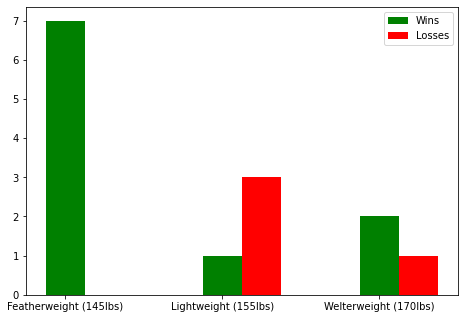

In [34]:
# Get wins and losses for each weight class
wins = [0,0,0]
losses = [0,0,0]
for idx in df.index:
    if df.loc[idx, "Weightclass"][0:3] == "FTW":
        if df.loc[idx, "W/L"] == "win":
            wins[0] += 1
        else:
            losses[0] += 1

    elif df.loc[idx, "Weightclass"][0:2] == "LW":
        if df.loc[idx, "W/L"] == "win":
            wins[1] += 1
        else:
            losses[1] += 1

    elif df.loc[idx, "Weightclass"][0:2] == "WW":
        if df.loc[idx, "W/L"] == "win":
            wins[2] += 1
        else:
            losses[2] += 1

# Initialize the bar chart
import numpy as np 
X = np.arange(3)
x_axis = [wins, losses]
fig = mlp.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, x_axis[0], color = 'g', width = 0.25)
ax.bar(X + 0.25, x_axis[1], color = 'r', width = 0.25)
ax.legend(labels=['Wins', 'Losses'])
ax.set_xticks(X, ("Featherweight (145lbs)", "Lightweight (155lbs)", "Welterweight (170lbs)"))

As shown by the bar chart, it seems that Conor actually did the best at his lightest, with 7 wins and 0 losses. The other two weight classes that he has competed at have been sort of a toss-up, but it's safe to say he's done the worst at what seems to be his natural weight, 155lbs, with 3 losses and only 1 win. It has been almost a year since Conor last fought, and rumor has it that he now weighs 190lbs. Only time will tell if this is a good or bad thing for Mystic Mac.

## Factor 3: Skill/Style
![SkillUrl](https://media.giphy.com/media/ZBQroqvYTBhiHbx3l7/giphy-downsized-large.gif "Skill")

That gif represents the peak of McGregor's career, in 2016 when he destroyed then-champ Eddie Alvarez to become the first ever two-divison champion in UFC history. If you'd like to see the masterclass that he put on, as well as his famous predictions and trash-talking leading up to the fight, this video is great: https://www.youtube.com/watch?v=1Y9Ne-in4LY&ab_channel=TheCrayTrey. After this fight, at the peak of his fame and skill, Conor took two years off of MMA. Why? Money. Conor made history by fighting arguably the greatest boxer of all time, Floyd Mayweather, in a 2017 boxing match. Conor made an estimated $30 million for that fight alone, so no wonder he sacrificed himself to Floyd. There was one problem with Conor taking this fight though: Conor had to train for months in only boxing, where MMA involves boxing, kicking, wrestling, grappling, and overall much more chaos. Before Floyd, in the UFC, Conor's record was 9 wins and 1 loss. After Floyd, it has been 1 win and 3 losses. So the question I wish to answer is: did boxing Floyd change Conor? Specifically, did his style change to be more boxing heavy, causing him to be easier to predict and therefore beat? Also, did Conor's style simply change over time?

In [68]:
# Get Conor's overall stat page
page = requests.request("GET", "http://ufcstats.com/fighter-details/f4c49976c75c5ab2")
page = bs(page.content, "html.parser")

# Get the links for each fight's stats, store them in a list
fight_links = []
for t in page.find_all("tr", class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click"):
    fight_links += [t["onclick"][7:-2]]

# Reverse the list so earliest fight is at index 0
fight_links.reverse()

# Get each fight stat page
all_stats = []
for link in fight_links:
    fight_page = requests.request("GET", link)
    fight_page = bs(fight_page.content, "html.parser")
    
    # Get the table of significant strikes stats
    sig_strikes = fight_page.find_all("table")[2]
    
    # Extract Conor's stats for each
    stats = sig_strikes.find_all("p", class_="b-fight-details__table-text")
    
    # Sometimes Conor's stats are displayed first, sometimes second. This handles that
    individual_stats = []
    start_index = 0
    if stats[0].text.strip() != "Conor McGregor":
        start_index = 1
    
    # Now grab each individual stat for this fight
    for i in range(start_index+2, len(stats), 2):
        individual_stats += [stats[i].text.strip()]
        
    # Add this fight's stats to list of all fights' stats
    all_stats += [individual_stats]
    
# 82 lines of python
all_stats

[['21 of 35',
  '60%',
  '20 of 34',
  '1 of 1',
  '0 of 0',
  '16 of 29',
  '0 of 0',
  '5 of 6'],
 ['53 of 153',
  '34%',
  '34 of 113',
  '4 of 17',
  '15 of 23',
  '42 of 135',
  '2 of 2',
  '9 of 16'],
 ['18 of 49',
  '36%',
  '15 of 44',
  '3 of 5',
  '0 of 0',
  '10 of 30',
  '0 of 0',
  '8 of 19'],
 ['9 of 29',
  '31%',
  '8 of 25',
  '1 of 4',
  '0 of 0',
  '5 of 25',
  '0 of 0',
  '4 of 4'],
 ['64 of 119',
  '53%',
  '49 of 99',
  '12 of 16',
  '3 of 4',
  '47 of 96',
  '10 of 14',
  '7 of 9'],
 ['46 of 92',
  '50%',
  '31 of 62',
  '15 of 30',
  '0 of 0',
  '39 of 84',
  '0 of 0',
  '7 of 8'],
 ['5 of 6', '83%', '4 of 4', '0 of 1', '1 of 1', '3 of 4', '0 of 0', '2 of 2'],
 ['61 of 140',
  '43%',
  '47 of 117',
  '7 of 11',
  '7 of 12',
  '56 of 133',
  '3 of 4',
  '2 of 3'],
 ['164 of 286',
  '57%',
  '98 of 212',
  '26 of 29',
  '40 of 45',
  '137 of 253',
  '27 of 32',
  '0 of 1'],
 ['32 of 84',
  '38%',
  '24 of 71',
  '7 of 11',
  '1 of 2',
  '24 of 67',
  '3 of 5',
  '5

After that painstaking data collection and curation, we now have a list of Conor's total significant strikes, significant strike percentage, head strikes, body strikes, leg strikes, strikes from a distance, clinch strikes, and ground strikes, for each of Conor's fights in the UFC. Let's see how Conor's accuracy has held up across his career, specifically for each kind of strike. Let's also see the ratio of different strike types to overall strikes, to see whether or not Conor really did start relying heavily on his boxing after Floyd. I'm not going to count ground, clinch, or distance strikes, as they can overlap with the other stats and aren't relevant to this analysis.

In [78]:
import re

# Iterate through the stats for each of Conor's fights
for fight in all_stats:
    this_fight = {}
    fight = fight[:5] # Get rid of the stats we don't care about
    
    # Use regex and string slicing to extract stats
    this_fight["Overall Significant Strikes Attempted"] = int(re.search("[0-9]+$", fight[0]).group())
    this_fight["Significant Strike Accuracy"] = fight[1]
    this_fight["Head Strikes Landed"] = int(re.search("^[0-9]+", fight[2]).group())
    this_fight["Head Strikes Attempted"] = int(re.search("[0-9]+$", fight[2]).group())
    this_fight["Head Strike Accuracy"] = this_fight["Head Strikes Landed"] / this_fight["Head Strikes Attempted"]
    this_fight["Body Strikes Landed"] = int(re.search("^[0-9]+", fight[3]).group())
    this_fight["Body Strikes Attempted"] = int(re.search("[0-9]+$", fight[3]).group())
    this_fight["Body Strike Accuracy"] = this_fight["Body Strikes Landed"] / this_fight["Body Strikes Attempted"]
    this_fight["Leg Strikes Landed"] = int(re.search("^[0-9]+", fight[4]).group())
    this_fight["Leg Strikes Attempted"] = int(re.search("[0-9]+$", fight[4]).group())
    if this_fight["Leg Strikes Attempted"] == 0:
        this_fight["Leg Strike Accuracy"] = 0.0
    else:
        this_fight["Leg Strike Accuracy"] = this_fight["Leg Strikes Landed"] / this_fight["Leg Strikes Attempted"]

{'Overall Significant Strikes Attempted': 35, 'Significant Strike Accuracy': '60%', 'Head Strikes Landed': 20, 'Head Strikes Attempted': 34, 'Head Strike Accuracy': 0.5882352941176471, 'Body Strikes Landed': 1, 'Body Strikes Attempted': 1, 'Body Strike Accuracy': 1.0, 'Leg Strikes Landed': 0, 'Leg Strikes Attempted': 0, 'Leg Strike Accuracy': 0.0}
{'Overall Significant Strikes Attempted': 153, 'Significant Strike Accuracy': '34%', 'Head Strikes Landed': 34, 'Head Strikes Attempted': 113, 'Head Strike Accuracy': 0.3008849557522124, 'Body Strikes Landed': 4, 'Body Strikes Attempted': 17, 'Body Strike Accuracy': 0.23529411764705882, 'Leg Strikes Landed': 15, 'Leg Strikes Attempted': 23, 'Leg Strike Accuracy': 0.6521739130434783}
{'Overall Significant Strikes Attempted': 49, 'Significant Strike Accuracy': '36%', 'Head Strikes Landed': 15, 'Head Strikes Attempted': 44, 'Head Strike Accuracy': 0.3409090909090909, 'Body Strikes Landed': 3, 'Body Strikes Attempted': 5, 'Body Strike Accuracy': 